In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
titanic = pd.read_csv("../data/original_data/train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 나이가 생존확률에 영향을 주는 요소일까?
- 생존자 수 - 나이 그래프로 특정 나이대의 생존 확률이 높은지 검사하자.
- 가로축은 나이가 와야한다.
- 세로축은 생존 여/부 의 수다.

## 특정 열에서 조건을 만족하는 행들의 히스토그램
### 데이터.가로축[필터].plot.hist()

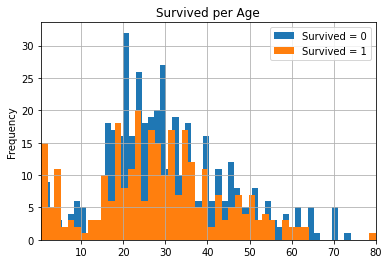

In [4]:
titanic.Age[titanic.Survived == 0].plot.hist(bins=50)
titanic.Age[titanic.Survived == 1].plot.hist(bins=50)

plt.grid()
plt.title("Survived per Age")
plt.xlim([titanic.Age.min(),titanic.Age.max()])
plt.legend(["Survived = 0","Survived = 1"])
plt.show()

# histogram은 어떤 경향을 보이는지 잘 알기 힘들다.
- kernel density plot 을 해보자

## 특정 열에서 조건을 만족하는 행들의 히스토그램
### 데이터.가로축[필터].plot.kde()

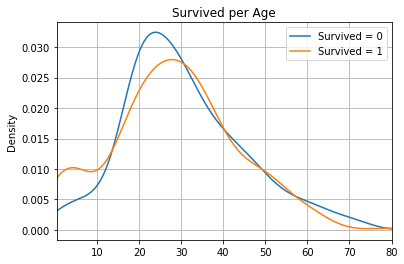

In [5]:
titanic.Age[titanic.Survived == 0].plot.kde()
titanic.Age[titanic.Survived == 1].plot.kde()

plt.grid()
plt.title("Survived per Age")
plt.xlim([titanic.Age.min(),titanic.Age.max()])
plt.legend(["Survived = 0","Survived = 1"])
plt.show()

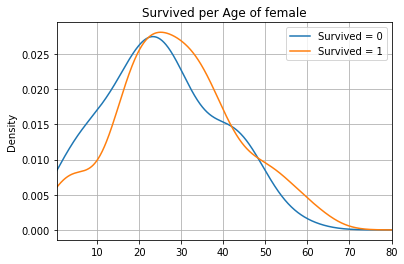

In [6]:
titanic.Age[titanic.Survived == 0][titanic.Sex == "female"].plot.kde()
titanic.Age[titanic.Survived == 1][titanic.Sex == "female"].plot.kde()

plt.grid()
plt.title("Survived per Age of female")
plt.xlim([titanic.Age.min(),titanic.Age.max()])
plt.legend(["Survived = 0","Survived = 1"])
plt.show()

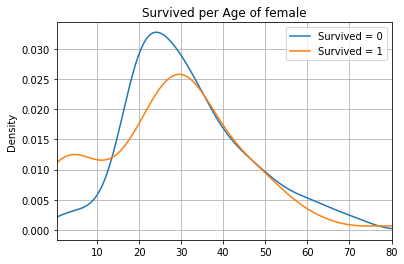

In [7]:
titanic.Age[titanic.Survived == 0][titanic.Sex == "male"].plot.kde()
titanic.Age[titanic.Survived == 1][titanic.Sex == "male"].plot.kde()

plt.grid()
plt.title("Survived per Age of female")
plt.xlim([titanic.Age.min(),titanic.Age.max()])
plt.legend(["Survived = 0","Survived = 1"])
plt.show()

# 성별이 생존 여부에 영향을 줄까?
- 성별은 남자, 여자 두가지 밖에 없으므로 파이차트를 이용하면 편하겠다.
- "남자" 차트에 생존 1/0 이 표시되도록 그린다.
- "여자" 차트에 생존 1/0 이 표시되도록 그린다.
- 생존 1 의 넓이 차를 통해 성별의 영향 유무를 알 수 있다.

## 특정 열에서 조건을 만족하는 데이터들이 다른 특정 열의 값을 어떻게 가지는지 보여주는 파이차트
### 데이터[특정 열에서 조건].groupby(다른 특정 열 이름).count().특정 열.plot.pie()

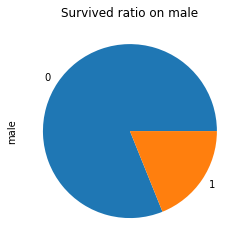

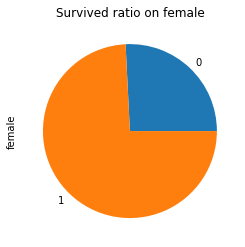

In [8]:
titanic[titanic.Sex == "male"].groupby("Survived").count().Sex.plot.pie()
plt.title("Survived ratio on male")
plt.ylabel("male")
plt.show()

titanic[titanic.Sex == "female"].groupby("Survived").count().Sex.plot.pie()
plt.title("Survived ratio on female")
plt.ylabel("female")
plt.show()

## Miss 와 Mrs 로 나이를 알 수 있을까?
- 이름중에 Miss와 Mrs 이 들어가는 항목들을 찾아낸다.
- Miss의 인원수-나이 histogram을 그린다.
- Mrs의 인원수-나이 histogram을 그린다.
- 둘의 최빈값이 확실하게 차이가 나는지 확인한다.

### 특정 문자열을 포함한 행 찾기
#### 데이터.열이름.srt.contains("패턴")

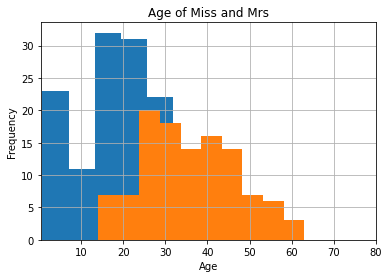

In [9]:
titanic.Age[titanic.Name.str.contains("Miss")].plot.hist()
titanic.Age[titanic.Name.str.contains("Mrs")].plot.hist()

plt.grid()
plt.title("Age of Miss and Mrs")
plt.xlim([titanic.Age.min(),titanic.Age.max()])
plt.xlabel("Age")
plt.show()

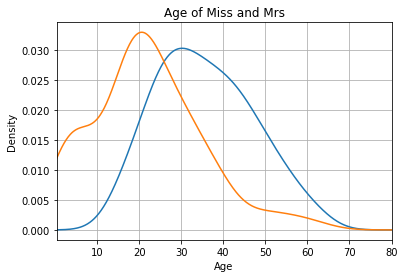

In [10]:
titanic.Age[titanic.Name.str.contains("Mrs")].plot.kde()
titanic.Age[titanic.Name.str.contains("Miss")].plot.kde()

plt.grid()
plt.title("Age of Miss and Mrs")
plt.xlim([titanic.Age.min(),titanic.Age.max()])
plt.xlabel("Age")
plt.show()

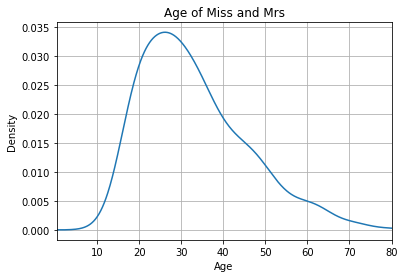

In [11]:
titanic.Age[titanic.Name.str.contains("Mr")].plot.kde()

plt.grid()
plt.title("Age of Miss and Mrs")
plt.xlim([titanic.Age.min(),titanic.Age.max()])
plt.xlabel("Age")
plt.show()

## 동승자가 많을수록 어리다고 할 수 있을까?
- 추측 : 당시 가족의 분포가 5인 가족 이상이 더 많았다면 동승자가 많을때 어린이일 확률이 높을 것이다.
- SibSp 는 함께 탑승한 형제 또는 배우자의 수다. -> 1 이상이면 가족끼리 탔다.
- Parch 는 함께 탑승한 부모 또는 자녀의 수이다. -> 1 이상이면 가족끼리 탔다.
- 성이 같은 사람 끼리는 부모-자녀, 형제, 배우자 일 가능성이 매우 높다.
- 성이 같으면서 나이가 30 이상인 경우 부모일 가능성이 높다.
- Parch 가 1 이상인 같은 성을 가진 사람들은 서로 부모-자녀 관계일 가능성이 높다.
- 부모-자녀 관계인 사람의 경우 SibSp가 1 이면 부모일 가능성이 높다.
- 그렇지 않고 Parch가 1이상 이면서 SibSp가 2 이상이면 어린 아이일 가능성이 높다.
- 남자 어린 아이면 살아남았을 확률이 높아진다.

### 우선 SibSp가 2 이상인 사람들의 나이를 kde으로 그려보자.
- SibSp가 2 이상이면 배우자보다는 형제를 표시했을 가능성이 높다.
- 따라서 20세 이하의 어린 나이일 확륙이 높다.
- Age가 누락되었다면 평균값으로 치환 가능할 것이다.

15.175


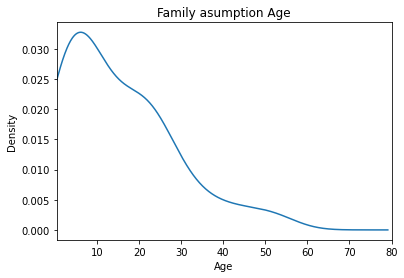

In [12]:
_df = titanic.Age[titanic.SibSp >= 2]
print(_df.mean())

_df.plot.kde()
plt.title("Family asumption Age")
plt.xlabel("Age")
plt.xlim([titanic.Age.min(), titanic.Age.max()])
plt.show()

### Parch 가 2보다 큰 경우 자녀들과 탔을 확률이 높다.

- Parch 가 2 보다 크면 부모를 기록했을 확률보다 자녀를 기록했을 확률이 높다.
- 이 경우 나이가 많을 가능성이 높다.
- 평균 40대임을 알 수 있다.
- Age가 누락되었을 경우 평균값으로 치환 가능할 것이다.

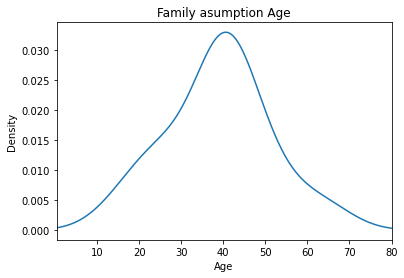

In [13]:
titanic.Age[titanic.Parch > 2].plot.kde()

plt.title("Family asumption Age")
plt.xlabel("Age")
plt.xlim([titanic.Age.min(), titanic.Age.max()])
plt.show()

### [남은 경우 1] Parch도 0, SibSp도 0인 경우
- 이 경우엔 혼자 탔으므로 어른일 확률이 높다.
- 평균 20대 임을 알 수 있다.

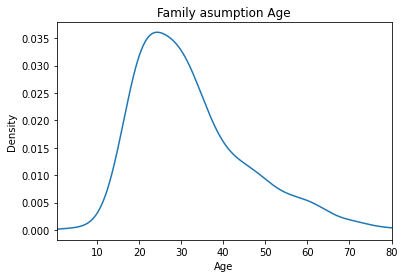

In [14]:
titanic.Age[titanic.Parch == 0][titanic.SibSp == 0].plot.kde()

plt.title("Family asumption Age")
plt.xlabel("Age")
plt.xlim([titanic.Age.min(), titanic.Age.max()])
plt.show()

### [남은 경우 2] Parch가 1, SibSp이 0
- 예측하기가 힘들다
- 1명의 부모와 함께 탄 경우 자녀가 없는 것이고 이때 나이가 많을지 적을지 알 수 없다.
- 1명의 자녀와 함께 탄 경우 배우자가 없는 경우고 이때는 나이가 많을 것이다.
- 하지만 자녀와 탔는지 부모와 탔는지 알 수 없기 때문에 예측하기 힘들다.
- 유의미한 생존연령을 생각했을때 어른 즉 20대 이상이 많은 것을 확인 했다.

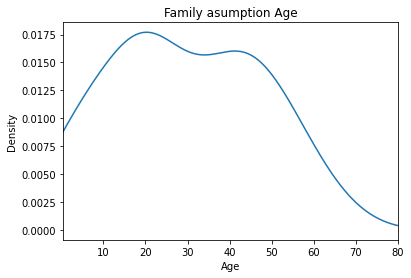

In [15]:
titanic.Age[titanic.Parch == 1][titanic.SibSp == 0].plot.kde()

plt.title("Family asumption Age")
plt.xlabel("Age")
plt.xlim([titanic.Age.min(), titanic.Age.max()])
plt.show()

### [남은 경우 3] Parch가 0 SibSp이 1
- 이 경우 형제와 함께 탔거나 배우자와 함께 탄 경우다.
- 그렇다면 보호자가 필요하지 않은 어른일 가능성이 높다.
- 결과적으로 30대라는 것이 밝혀졌다.

32.068627450980394


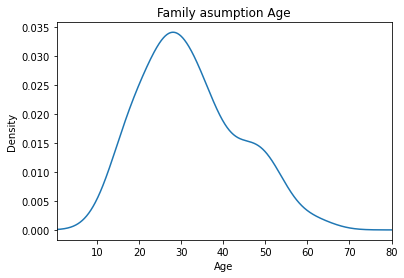

In [16]:
_df = titanic.Age[titanic.Parch == 0][titanic.SibSp == 1]
print(_df.mean())

_df.plot.kde()
plt.title("Family asumption Age")
plt.xlabel("Age")
plt.xlim([titanic.Age.min(), titanic.Age.max()])
plt.show()

### [남은 경우 4] Parch가 1 SibSp이 1
- 이 경우 형제와 탔는데 부모가 1명인 경우와 배우자와 탔는데 자녀가 1명일 확률이 가장 높다.
- 그 중에서 배우자와 탑승하고 자녀와 탔을 경우가 더 가능성이 높기 때문에 어른일 확률이 높다.
- 결과 어른 즉 부모의 경우가 더 많았지만 형제와 함께탄 경우도 많았다.
- 하지만 40대 를 기점으로 적은 차이를 보여줄뿐 유의미한 결과는 없었다.

27.064814814814813
6.397306397306397


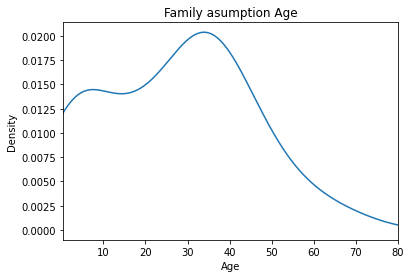

In [17]:
_df = titanic.Age[titanic.Parch == 1][titanic.SibSp == 1]
print(_df.mean())
print(100 * len(_df)/len(titanic))

_df.plot.kde()
plt.title("Family asumption Age")
plt.xlabel("Age")
plt.xlim([titanic.Age.min(), titanic.Age.max()])
plt.show()

<AxesSubplot:xlabel='Pclass'>

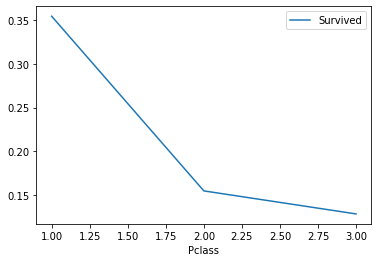

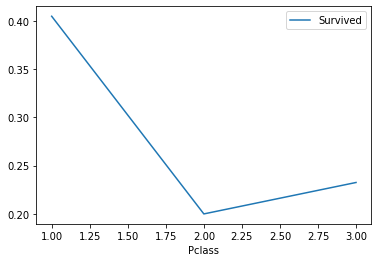

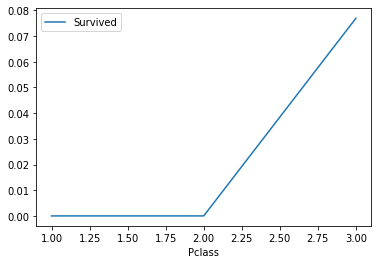

In [34]:
titanic[["Pclass", "Survived"]]\
.loc[titanic.Embarked == "S"]\
.loc[titanic.Sex == "male"]\
.groupby("Pclass").mean()\
.plot()

titanic[["Pclass", "Survived"]]\
.loc[titanic.Embarked == "C"]\
.loc[titanic.Sex == "male"]\
.groupby("Pclass").mean()\
.plot()

titanic[["Pclass", "Survived"]]\
.loc[titanic.Embarked == "Q"]\
.loc[titanic.Sex == "male"]\
.groupby("Pclass").mean()\
.plot()


In [ ]:
_df = titanic.Age[titanic.Pclass == 1][titanic.Sex == 1]
print(_df.mean())

_df.plot.hist()
plt.title("Family asumption Age")
plt.xlabel("Age")
plt.xlim([titanic.Age.min(), titanic.Age.max()])
plt.show()

In [3]:
%config Completer.use_jedi = False

In [ ]:
import sklearn.svm.SVC